In [60]:
import h5py
import galaxychop as gchop
import uttr
import attr
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

# Leo la galaxia

In [96]:
gal = gchop.io.read_hdf5("gal_01")

In [97]:
gal = gchop.preproc.center(gal)

In [98]:
gal = gchop.preproc.star_align(gal)

In [99]:
gal.to_dataframe()

,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,potential,kinetic_energy,total_energy,Jx,Jy,Jz
0,stars,0,1595014.7,4.481305,-13.876980,1.771661,237.268143,74.651624,-2.319399,0.0,-154817.656250,30937.208227,-123880.448023,-100.071083,430.752564,3627.102030
1,stars,0,1595014.7,2.625075,-5.807253,1.463605,25.003830,43.294862,-15.622839,0.0,-195593.406250,1371.854850,-194221.551400,27.359208,77.606857,258.855835
2,stars,0,1595014.7,1.723671,-22.160112,-0.791744,224.438150,1.329465,3.345898,0.0,-130153.328125,25192.722736,-104960.605389,-73.092882,-183.464810,4975.866077
3,stars,0,1595014.7,2.925732,-1.504470,-0.193014,126.805757,102.866981,79.549695,0.0,-219007.468750,16494.735008,-202512.733742,-99.825362,-257.216402,491.736711
4,stars,0,1595014.7,-10.048317,10.162460,-0.609369,-161.607877,-185.220680,-43.562236,0.0,-156627.156250,31160.737322,-125466.418928,-555.567281,-339.248269,3503.489675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132298,dark_matter,1,8603779.1,-18.746821,-20.229464,29.593525,89.935588,44.853004,272.211112,0.0,-92974.679688,42099.545783,-50875.133904,-6834.043294,7764.604000,978.497488
132299,dark_matter,1,8603779.1,2.400414,78.531618,-62.206739,-12.800665,-153.448125,-41.828682,0.0,-45958.687500,12729.911434,-33228.776066,-12830.381640,896.693770,636.917833
132300,dark_matter,1,8603779.1,23.550165,-30.702812,6.136435,111.933838,-322.883289,74.748521,0.0,-95033.187500,61185.071959,-33848.115541,-313.637385,-1073.465292,-4167.271309
132301,dark_matter,1,8603779.1,-7.850573,10.141829,5.490703,216.654306,30.351059,-21.016684,0.0,-157914.203125,24150.988044,-133763.215081,-379.796283,1024.591542,-2435.544171


# Descomposicion

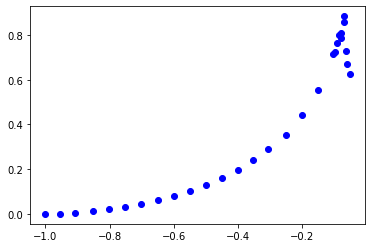

In [100]:
circ = gchop.preproc.jcirc(gal)
plt.plot(circ.x,circ.y, 'bo')

## Threshold

In [101]:
decomposer = gchop.models.JThreshold()
comp= decomposer.decompose(gal)
labels_th = comp.labels[comp.ptypes == 'stars']
#cmp_labels.describe()
#comp.to_dataframe()

<AxesSubplot:xlabel='eps', ylabel='Density'>

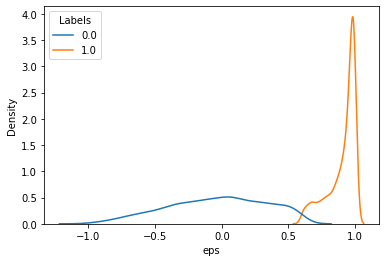

In [102]:
gal.plot.circ_kde("eps",labels=labels_th)

## Abadi+03

In [103]:
decomposer = gchop.models.JHistogram()
comp = decomposer.decompose(gal)
labels_ab = comp.labels[comp.ptypes == 'stars']
print(labels_ab)
comp.describe
#lmap = {0: "spheroid", 1: "thin-disk", 2: "thick disk"}
#comp.describe(lmap=lmap)

[1. 0. 1. ... 0. 0. 0.]


<bound method Components.describe of <Components length=132303, labels={'Spheroid', 'Disk', nan}, probabilities=False, lmap=True>>

<AxesSubplot:xlabel='eps', ylabel='Density'>

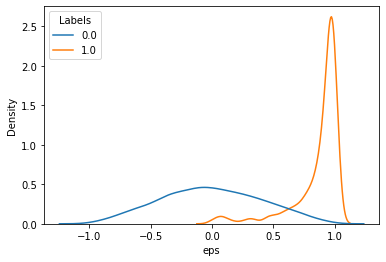

In [104]:
gal.plot.circ_kde("eps",labels=labels_ab)

## K-means

In [105]:
decomposer = gchop.models.KMeans(random_state=1111111)
comp = decomposer.decompose(gal)
labels_km = comp.labels[comp.ptypes == 'stars']

ValueError: Algorithm must be 'auto', 'full' or 'elkan', got lloyd instead.

In [106]:
gal.plot.circ_kde("eps",labels=labels_km)

NameError: name 'labels_km' is not defined

In [107]:
decomposer = gchop.models.KMeans(n_components=3, random_state=111111)
cmp_labels = decomposer.decompose(gal)
labels_km3 = cmp_labels.labels[cmp_labels.ptypes == 'stars']

print(cmp_labels.describe())
#gal.plot.circ_kde("eps",labels=labels_km3)




#lab0: Bulge
#lab1: Thin Disk
#lab2: Thick Disk

ValueError: Algorithm must be 'auto', 'full' or 'elkan', got lloyd instead.

In [ ]:
gal.plot.circ_kde("eps",labels=labels_km3)

In [25]:
decomposer = gchop.models.GaussianMixture(n_components=4, random_state=40) 
cmp_labels = decomposer.decompose(gal)
labels_gmm4 = cmp_labels.labels[cmp_labels.ptypes == 'stars']

#Con --> random_state=111806)
#lab0: Thin Disk
#lab1: Bulge
#lab2: Stellar halo
#lab3: Thick disk

#for index, value in enumerate(labels_gmm4):
#    if value == 0:
#      labels_gmm4[index] = 2
#    if value == 2:
#      labels_gmm4[index] = 0

#Probabilities
describe_gmm4=cmp_labels.describe()
cmp_labels.describe()

Particles           Deterministic mass           Probabilistic mass  \
       Size  Fraction               Size  Fraction               Size   
0      4908  0.131642       4.888114e+09  0.131000       6.603724e+09   
1      7985  0.214173       7.456528e+09  0.199833       7.092121e+09   
2     11912  0.319502       1.263457e+10  0.338603       1.185579e+10   
3     12478  0.334683       1.233460e+10  0.330564       1.176218e+10   

             
   Fraction  
0  0.176978  
1  0.190067  
2  0.317732  
3  0.315223

<AxesSubplot:xlabel='eps', ylabel='Density'>

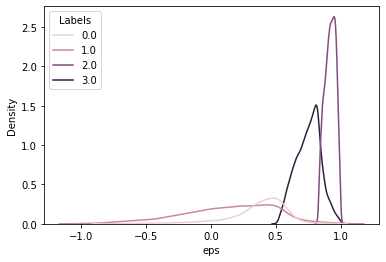

In [26]:
gal.plot.circ_kde("eps",labels=labels_gmm4)

## Auto-GMM

In [27]:
decomposer = gchop.models.AutoGaussianMixture() #njobs paralell
cmp_labels = decomposer.decompose(gal)
labels_agmm = cmp_labels.labels[cmp_labels.ptypes == 'stars']

#Probabilities
describe_agmm=cmp_labels.describe()
cmp_labels.describe()

Particles           Deterministic mass           Probabilistic mass  \
               Size  Fraction               Size  Fraction               Size   
Halo           5275  0.141485       5.224247e+09  0.140008       5.965654e+09   
Bulge          5380  0.144302       5.013491e+09  0.134360       5.094411e+09   
Cold disk      8058  0.216131       8.661160e+09  0.232117       8.271515e+09   
Warm disk     18570  0.498082       1.841491e+10  0.493515       1.798223e+10   

                     
           Fraction  
Halo       0.159878  
Bulge      0.136529  
Cold disk  0.221674  
Warm disk  0.481919

<AxesSubplot:xlabel='eps', ylabel='Density'>

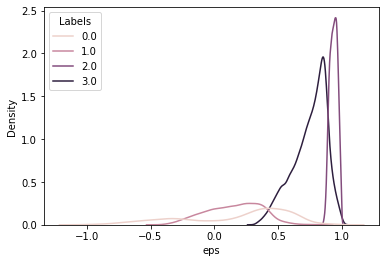

In [28]:
gal.plot.circ_kde("eps",labels=labels_agmm)

# DataFrame stars particles

In [29]:
dfs = gal.stars.to_dataframe()

In [30]:
print(len(gal.stars.x))
print(len(labels_th))

37393
37393


In [31]:
dfs.isnull().sum()

ptype             0
ptypev            0
m                 0
x                 0
y                 0
z                 0
vx                0
vy                0
vz                0
softening         0
potential         0
kinetic_energy    0
total_energy      0
Jx                0
Jy                0
Jz                0
dtype: int64

In [32]:
#Agrego labels al data frame
dfs["lab_th"]=labels_th
dfs["lab_ab"]=labels_ab
dfs["lab_cr"]=labels_cr
dfs["lab_km"]=labels_km
dfs["lab_km3"]=labels_km3
dfs["lab_km4"]=labels_km4
#Para los GMM se usa la probabilididad, no los labels
dfs["lab_gmm"]=labels_gmm
dfs["lab_gmm3"]=labels_gmm3
dfs["lab_gmm4"]=labels_gmm4
dfs["lab_agmm"]=labels_agmm

In [33]:
dfs

,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,...,lab_th,lab_ab,lab_cr,lab_km,lab_km3,lab_km4,lab_gmm,lab_gmm3,lab_gmm4,lab_agmm
0,stars,0,5.224283e+05,-0.053393,-0.063512,-0.261071,6.017590,22.533272,-6.051982,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,stars,0,9.745897e+05,-0.160266,-0.127742,-0.178286,21.924235,8.289647,-0.418943,0.0,...,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0
2,stars,0,6.935776e+05,-0.255175,-0.165614,-0.198094,-9.574002,7.298885,15.571255,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,stars,0,1.070959e+06,-0.233303,-0.256464,-0.370506,-9.678900,-5.458488,-0.866013,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,stars,0,6.013803e+05,-0.075262,-0.200221,-0.282568,16.644463,8.046805,-16.925347,0.0,...,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37388,stars,0,9.867470e+05,135.738559,-160.160626,-15.369098,-56.741920,57.947940,121.877589,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
37389,stars,0,8.290853e+05,14.748290,15.584324,-5.206648,-6.194351,263.651947,313.783409,0.0,...,0.0,1.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0
37390,stars,0,1.004103e+06,16.885028,56.265101,-2.875864,-43.605196,304.321445,11.364916,0.0,...,0.0,1.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0
37391,stars,0,1.526682e+06,270.481924,-80.307674,15.246717,-89.287180,-51.203767,-23.223115,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0


<AxesSubplot:xlabel='x', ylabel='y'>

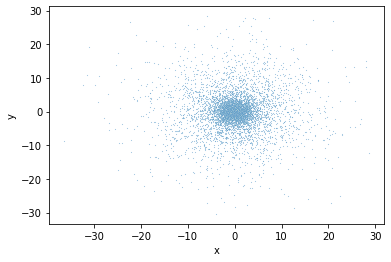

In [108]:
gal.plot.scatter("x","y", alpha=.5, s=5, ptypes=['stars'])

<AxesSubplot:xlabel='x', ylabel='y'>

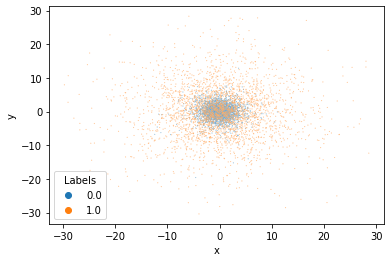

In [109]:
gal.plot.scatter("x","y", alpha=.5, s=5, ptypes=['stars'], labels=labels_ab)

# Save DataFrame Stars 

In [ ]:
gal.to_dataframe().to_p

In [35]:
#dfs.to_pickle('df_stars_gal394242_rvir.pkl')

In [37]:
gal.to_pickle('gal394242_rvir.pkl')

AttributeError: 'Galaxy' object has no attribute 'to_pickle'

# df Probabilities

In [ ]:
#describe_gmm.to_pickle('describe_gmm_gal394242_rvir.pkl')

In [ ]:
#describe_gmm3.to_pickle('describe_gmm3_gal394242_rvir.pkl')

In [ ]:
#describe_gmm4.to_pickle('describe_gmm4_gal394242_rvir.pkl')

In [ ]:
#describe_agmm.to_pickle('describe_agmm_gal394242_rvir.pkl')

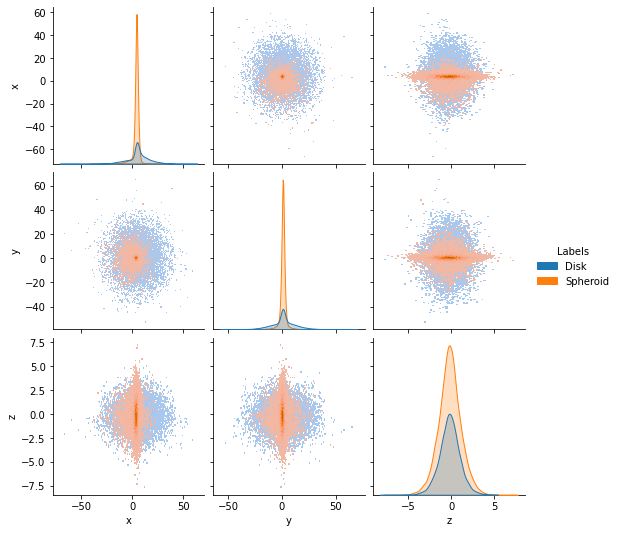

In [29]:
gal.plot(labels=components)